In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scale it to the range [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Initialize the model
model = Sequential()

# Flatten the input data to a 1D vector
model.add(Flatten(input_shape=(28, 28)))

# Add fully connected layers (hidden layers)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with 10 neurons (one for each class) and softmax activation for classification
model.add(Dense(10, activation='softmax'))


In [5]:
# Compile the model
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=11, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7285 - loss: 1.0308 - val_accuracy: 0.9167 - val_loss: 0.3076
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9131 - loss: 0.3025 - val_accuracy: 0.9266 - val_loss: 0.2511
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9307 - loss: 0.2457 - val_accuracy: 0.9374 - val_loss: 0.2133
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9392 - loss: 0.2154 - val_accuracy: 0.9437 - val_loss: 0.1884
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9476 - loss: 0.1827 - val_accuracy: 0.9497 - val_loss: 0.1730
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9539 - loss: 0.1598 - val_accuracy: 0.9543 - val_loss: 0.1555
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9576 - loss: 0.1479 - val_accuracy: 0.9580 - val_loss: 0.1451
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9626 - loss: 0.1288 

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9607 - loss: 0.1316
Test Loss: 0.11215484887361526
Test Accuracy: 0.9661999940872192


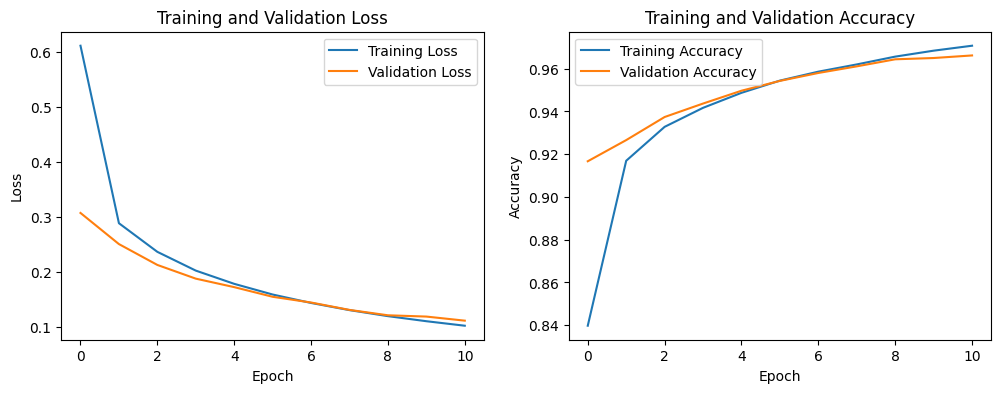

In [7]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()
